<a href="https://colab.research.google.com/github/Delsa2001/DSGP/blob/Deshan/Model%20updated%20latest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [4]:


# Step 2: Load the datasets
galle_weather = pd.read_csv('galle_weather_updated.csv')
colombo_weather = pd.read_csv('colombo_weather_updated.csv')

# Step 3: Combine the datasets and preprocess
galle_weather['Location'] = 'Galle'
colombo_weather['Location'] = 'Colombo'
combined_weather = pd.concat([galle_weather, colombo_weather], ignore_index=True)

# Save the combined dataset to a CSV file
combined_weather.to_csv('combined_weather.csv', index=False)
print("Combined weather file has been saved as 'combined_weather.csv'.")



Combined weather file has been saved as 'combined_weather.csv'.


In [5]:

# Load the dataset
file_path = 'combined_weather.csv'  # Replace with your dataset path
data = pd.read_csv(file_path)

# Preview the dataset
print("Dataset Preview:")
print(data.head())
print("\nDataset Info:")
print(data.info())


Dataset Preview:
       Date  Temperature  Precipitation  Humidity  \
0  20190101        26.90           0.85     75.50   
1  20190102        26.55           0.33     75.00   
2  20190103        26.70           0.12     73.31   
3  20190104        26.61           0.08     72.19   
4  20190105        26.73           0.24     75.94   

           Suitable_Plant_Type Location  
0  Root Vegetables / Cucurbits    Galle  
1  Root Vegetables / Cucurbits    Galle  
2  Root Vegetables / Cucurbits    Galle  
3  Root Vegetables / Cucurbits    Galle  
4  Root Vegetables / Cucurbits    Galle  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 3652 non-null   int64  
 1   Temperature          3652 non-null   float64
 2   Precipitation        3652 non-null   float64
 3   Humidity             3652 non-null  

In [9]:
# Check for missing values
print("Missing values in each column:")
print(data.isnull().sum())

# Drop rows with missing target values, if applicable
data = data.dropna(subset=['Suitable_Plant_Type'])  # Replace 'target_column' with the column name for plant type

# Fill missing values for weather data columns with the mean or median
# Update weather_columns to reflect the actual column names in your DataFrame
weather_columns = ['Temperature', 'Humidity', 'Precipitation']  # Assuming column names are 'Temperature', 'Humidity', 'Rainfall'
for col in weather_columns:
    data[col].fillna(data[col].mean(), inplace=True)

# Verify if missing values are handled
print("\nMissing values after handling:")
print(data.isnull().sum())

Missing values in each column:
Date                   0
Temperature            0
Precipitation          0
Humidity               0
Suitable_Plant_Type    0
Location               0
dtype: int64

Missing values after handling:
Date                   0
Temperature            0
Precipitation          0
Humidity               0
Suitable_Plant_Type    0
Location               0
dtype: int64


<ipython-input-9-cb6bfff910c0>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)


In [10]:
# Encode the target variable (plant type) if it's categorical
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['target_column'] = label_encoder.fit_transform(data['Suitable_Plant_Type'])  # Replace 'target_column' with your column name

# Verify encoding
print("\nEncoded Target Values:")
print(data['target_column'].unique())



Encoded Target Values:
[1 0]


In [13]:
# Define features (X) and target (y)
X = data[['Temperature', 'Humidity', 'Precipitation']]  # Replace with your actual weather columns
y = data['Suitable_Plant_Type']  # Replace with the encoded target column name

# Display feature and target shapes
print("\nFeatures shape:", X.shape)
print("Target shape:", y.shape)



Features shape: (3652, 3)
Target shape: (3652,)


In [14]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display dataset sizes
print("\nTraining Set Size:", X_train.shape)
print("Testing Set Size:", X_test.shape)



Training Set Size: (2921, 3)
Testing Set Size: (731, 3)


In [15]:
# Initialize the Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Print feature importance
print("\nFeature Importance:")
for feature, importance in zip(X.columns, model.feature_importances_):
    print(f"{feature}: {importance:.4f}")



Feature Importance:
Temperature: 0.4868
Humidity: 0.2830
Precipitation: 0.2302



Accuracy: 0.786593707250342

Classification Report:
                             precision    recall  f1-score   support

 Leafy Greens / Nightshades       0.79      0.74      0.77       343
Root Vegetables / Cucurbits       0.78      0.82      0.80       388

                   accuracy                           0.79       731
                  macro avg       0.79      0.78      0.78       731
               weighted avg       0.79      0.79      0.79       731



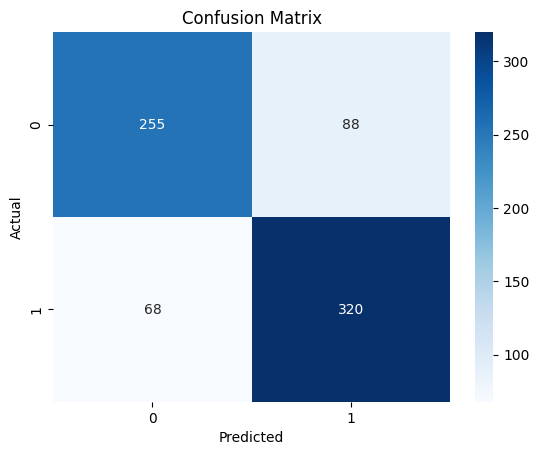

In [16]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [23]:
# Example input data (replace with actual data for prediction)
new_data = pd.DataFrame({
    'Temperature': [28, 30],  # Replace with new temperature values
    'Humidity': [70, 65],    # Replace with new humidity values
    'Precipitation': [150, 100]   # Replace with new rainfall values
})

# Get prediction probabilities
prediction_probabilities = model.predict_proba(new_data)

# Set a confidence threshold (e.g., 0.7)
confidence_threshold = 0.7

decoded_predictions = []
for i, prediction in enumerate(predictions):
    # Get the maximum probability for the prediction
    max_probability = prediction_probabilities[i].max()

    if max_probability >= confidence_threshold:
        try:
            decoded_prediction = label_encoder_for_decoding.inverse_transform([prediction])[0]
            decoded_predictions.append(decoded_prediction)
        except ValueError:
            print(f"Warning: Predicted plant type '{prediction}' not in training data. Handling as unknown.")
            decoded_predictions.append("Unknown")  # Or any other placeholder for unknown values
    else:
        decoded_predictions.append("Unknown (Low Confidence)")

# Print the decoded predictions
print("\nPredicted Plant Types for New Data:")
print(decoded_predictions)


Predicted Plant Types for New Data:
['Unknown (Low Confidence)', 'Unknown (Low Confidence)']


In [24]:
import joblib

# Save the trained model
joblib.dump(model, 'random_forest_model.pkl')

# Load the model later for prediction
loaded_model = joblib.load('random_forest_model.pkl')
